In [1]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def as_html(model, results):
    rendered = model.render_html(results)    
    return HTML(rendered)

def results_for_spec(spec, rounds):
    model = parse(spec)
    results = model.run(rounds=rounds)
    return model, results


def chart(title, xlabel, ylabel, keys, named_results):
    named_lines = {}
    for name, results in named_results.items():
        for key in keys:
            line_name = key
            if name:
                line_name = name + " " + line_name            
            named_lines[line_name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


def multi_result_chart(title, xlabel, ylabel, key, named_results):
    named_lines = {}
    for name, results in named_results.items():
        named_lines[name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


In [30]:
spec = """
HiringRate(10)
ProductEngineers(1000)
[PotentialHires] > ProductEngineers @ HiringRate

[PotentialServices] > RequestedServices(10) @ ProductEngineers / 10
RequestedServices > InflightServices(0, 10) @ Leak(1.0)
InflightServices > PortNameAssigned @ Leak(1.0)
PortNameAssigned > PuppetGenerated @ Leak(1.0)
PuppetGenerated > PuppetConfigMerged @ Leak(1.0)
PuppetConfigMerged > ServerCapacityAllocated @ Leak(1.0)
"""
model1, results1 = results_for_spec(spec, 100)

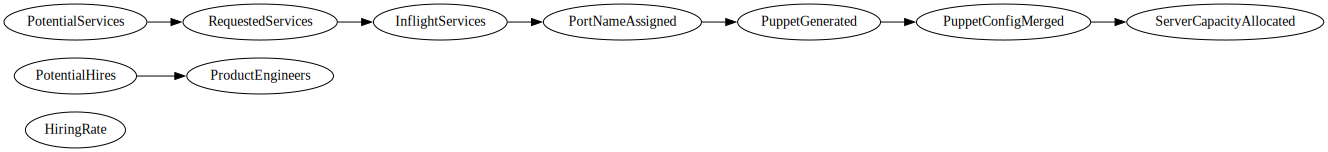

In [31]:
as_dot(model1)

<Axes: title={'center': 'Service Provisioning Pipeline'}, xlabel='Rounds', ylabel='Size of Stock'>

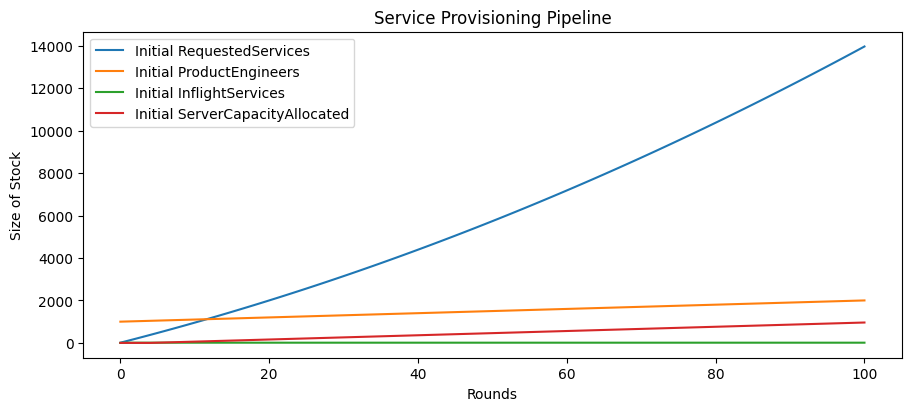

In [32]:
title = 'Service Provisioning Pipeline'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
cols = ['RequestedServices', 'ProductEngineers', 'InflightServices', 'ServerCapacityAllocated']

# these are for debugging
all_cols = ['RequestedServices', 'ProductEngineers', 'InflightServices', 'ServerCapacityAllocated',
            'PortNameAssigned', 'PuppetGenerated', 'PuppetConfigMerged']
inprocess_cols = ['PortNameAssigned', 'PuppetGenerated', 'PuppetConfigMerged', 'ServerCapacityAllocated']


combined1 = {'Initial': results1 }
chart(title, x_axis, y_axis, cols, combined1)

In [39]:
spec_errors = """
HiringRate(10)
ProductEngineers(1000)
[PotentialHires] > ProductEngineers @ HiringRate

[PotentialServices] > RequestedServices(10) @ ProductEngineers / 10
RequestedServices > InflightServices(0, 10) @ Leak(1.0)
InflightServices > PortNameAssigned @ Leak(1.0)
PortNameAssigned > PuppetGenerated @ Leak(0.8)
PortNameAssigned > RequestedServices @ Leak(0.2)

PuppetGenerated > PuppetConfigMerged @ Leak(0.8)
PuppetGenerated > InflightServices @ Leak(0.2)

PuppetConfigMerged > ServerCapacityAllocated @ Leak(0.8)
PuppetConfigMerged > PuppetGenerated @ Leak(0.2)
"""
model2, results2 = results_for_spec(spec_errors, 100)

<Axes: title={'center': 'Service Provisioning Pipeline'}, xlabel='Rounds', ylabel='Size of Stock'>

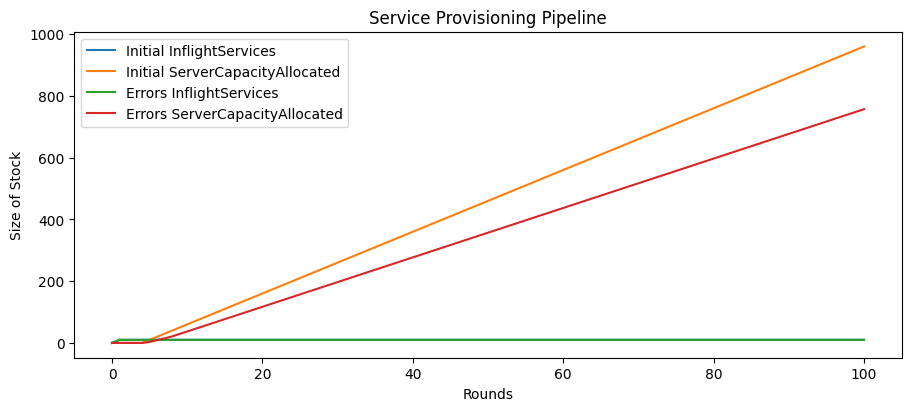

In [45]:
title = 'Service Provisioning Pipeline'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
cols = ['InflightServices', 'ServerCapacityAllocated']

# these are for debugging
all_cols = ['RequestedServices', 'ProductEngineers', 'InflightServices', 'ServerCapacityAllocated',
            'PortNameAssigned', 'PuppetGenerated', 'PuppetConfigMerged']
inprocess_cols = ['PortNameAssigned', 'PuppetGenerated', 'PuppetConfigMerged']

combined2 = {'Initial': results1, 'Errors': results2 }
chart(title, x_axis, y_axis, cols, combined2)

In [51]:
spec_port_errors = """
HiringRate(10)
ProductEngineers(1000)
[PotentialHires] > ProductEngineers @ HiringRate

[PotentialServices] > RequestedServices(10) @ ProductEngineers / 10
RequestedServices > InflightServices(0, 10) @ Leak(1.0)
InflightServices > PortNameAssigned @ Leak(1.0)
PortNameAssigned > PuppetGenerated @ Leak(0.5)
PortNameAssigned > RequestedServices @ Leak(0.5)

PuppetGenerated > PuppetConfigMerged @ Leak(0.8)
PuppetGenerated > InflightServices @ Leak(0.2)

PuppetConfigMerged > ServerCapacityAllocated @ Leak(0.8)
PuppetConfigMerged > PuppetGenerated @ Leak(0.2)
"""
model_port_errors, results_port_errors = results_for_spec(spec_port_errors, 100)

spec_puppet_generated_errors = """
HiringRate(10)
ProductEngineers(1000)
[PotentialHires] > ProductEngineers @ HiringRate

[PotentialServices] > RequestedServices(10) @ ProductEngineers / 10
RequestedServices > InflightServices(0, 10) @ Leak(1.0)
InflightServices > PortNameAssigned @ Leak(1.0)
PortNameAssigned > PuppetGenerated @ Leak(0.8)
PortNameAssigned > RequestedServices @ Leak(0.2)

PuppetGenerated > PuppetConfigMerged @ Leak(0.5)
PuppetGenerated > InflightServices @ Leak(0.5)

PuppetConfigMerged > ServerCapacityAllocated @ Leak(0.8)
PuppetConfigMerged > PuppetGenerated @ Leak(0.2)
"""
model_puppet_generated_errors, results_puppet_generated_errors = results_for_spec(spec_puppet_generated_errors, 100)

spec_puppet_merged_errors = """
HiringRate(10)
ProductEngineers(1000)
[PotentialHires] > ProductEngineers @ HiringRate

[PotentialServices] > RequestedServices(10) @ ProductEngineers / 10
RequestedServices > InflightServices(0, 10) @ Leak(1.0)
InflightServices > PortNameAssigned @ Leak(1.0)
PortNameAssigned > PuppetGenerated @ Leak(0.8)
PortNameAssigned > RequestedServices @ Leak(0.2)

PuppetGenerated > PuppetConfigMerged @ Leak(0.8)
PuppetGenerated > InflightServices @ Leak(0.2)

PuppetConfigMerged > ServerCapacityAllocated @ Leak(0.5)
PuppetConfigMerged > PuppetGenerated @ Leak(0.5)
"""
model_puppet_merged_errors, results_puppet_merged_errors = results_for_spec(spec_puppet_merged_errors, 100)

<Axes: title={'center': 'Impact of Error Rates on Provisioning Pipeline'}, xlabel='Rounds', ylabel='Size of Stock'>

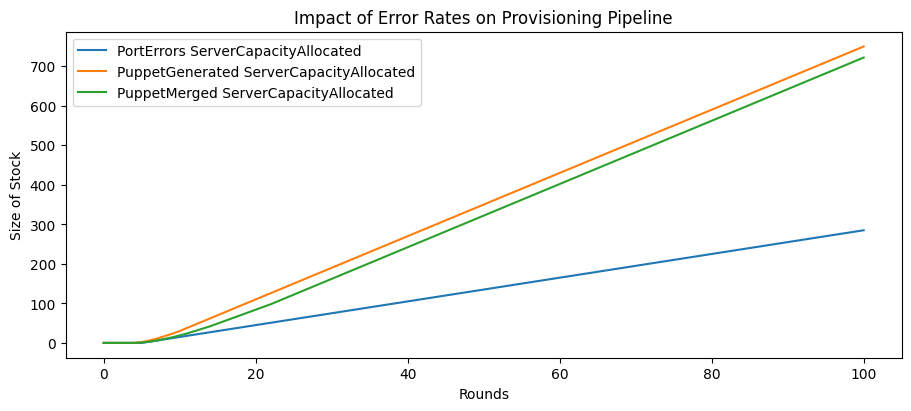

In [50]:
title = 'Impact of Error Rates on Provisioning Pipeline'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
#cols = ['InflightServices', 'ServerCapacityAllocated']
cols = ['ServerCapacityAllocated']


combined_errors = {
    'PortErrors': results_port_errors,
    'PuppetGenerated': results_puppet_generated_errors,
    'PuppetMerged': results_puppet_merged_errors,

}
chart(title, x_axis, y_axis, cols, combined_errors)